# Analisando dados de Gastos com Cartão de Crédito na India

### Objetivo:
    

In [106]:
#importando as bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt

In [107]:
#lendo e imprimindo as primeiras 10 linhas

tabela = pd.read_csv('CreditCardTransactions-India.csv')
tabela.head(10)

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574
5,5,"Delhi, India",8-Sep-14,Silver,Bills,F,100036
6,6,"Delhi, India",24-Feb-15,Gold,Bills,F,143250
7,7,"Greater Mumbai, India",26-Jun-14,Platinum,Bills,F,150980
8,8,"Delhi, India",28-Mar-14,Silver,Bills,F,192247
9,9,"Delhi, India",1-Sep-14,Platinum,Bills,F,67932


## Informações gerais sobre a Base de Dados

#### Quantas Entradas(linhas) e Variáveis(colunas) a base de dados possui? 

In [10]:
print('---- A base de dados apresenta ----')
print(f'Entradas: {tabela.shape[0]}')
print(f'Variáveis: {tabela.shape[1]}')

---- A base de dados apresenta ----
Entradas: 26052
Variáveis: 7


#### Tipos de dados(dtypes) das variáveis 

In [11]:
tipos_de_dados = pd.DataFrame(tabela.dtypes, columns = ['Tipos de Dados'])
tipos_de_dados.columns.name = 'Variáveis'
tipos_de_dados

Variáveis,Tipos de Dados
index,int64
City,object
Date,object
Card Type,object
Exp Type,object
Gender,object
Amount,int64


# Nome da Variável 	        |         Descrição
* **City** --- Cidade que a transação ocorreu. **|** The city in which the transaction took place. (String) &nbsp;
* **Date** --- Data que a transação foi feita **|** The date of the transaction. (Date) &nbsp;
* **Card Type** --- Tipo do cartão usado na transação **|** The type of credit card used for the transaction. (String) &nbsp;
* **Exp Type** --- Tipo de despesa associada à transação. **|** The type of expense associated with the transaction. (String) &nbsp;
* **Gender** --- Gênero do titular do cartão. **|** The gender of the cardholder. (String) &nbsp;
* **Amount** --- Quantidade de transações feitas. **|** The amount of the transaction. (Number) &nbsp;

### Renomeando Variáveis(colunas)

In [110]:
tabela.columns = ["index", "Cidade", "Data", "Tipo do Cartão", "Despesa", "Genero", "Quantidade"]
tabela.head()

,index,Cidade,Data,Tipo do Cartão,Despesa,Genero,Quantidade
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


### Verificação se possui valores ausentes ou dados duplicados:

In [82]:
#Valores ausentes
tabela.isnull().values.any()

False

In [80]:
#Dados duplicados
tabela.duplicated().sum()

0

### Tipos e quantidades de Cartões:

In [132]:
tabela['Tipo do Cartão'].value_counts()

Silver       6840
Signature    6447
Platinum     6398
Gold         6367
Name: Tipo do Cartão, dtype: int64

## Vamos analisar o gênero que mais teve transações.

### Quantidades de Homens e mulheres:

In [183]:
coluna_genero = tabela['Genero']
distincao_Masc_Fem = coluna_genero.value_counts()
display(distincao_Masc_Fem)

F    13680
M    12372
Name: Genero, dtype: int64

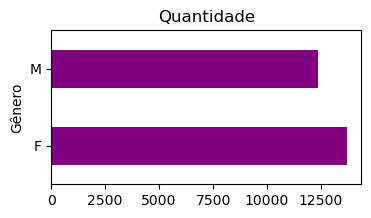

In [126]:
plt.rc('figure', figsize = (4,2))
fig = tabela['Genero'].value_counts().plot.barh(color ='purple', width = 0.5)
fig.set_ylabel('Gênero')
fig.set_title('Quantidade')
plt.show()

### Pegando Porcentagem entre homens e mulheres:

In [188]:
porcentagem_sexo = [100*x/distincao_Masc_Fem.sum() for x in distincao_Masc_Fem]
print(f'Existem -{porcentagem_sexo}- porcentos de mulheres e homens respectivamente.')

Existem -[52.510363887609394, 47.489636112390606]- porcentos de mulheres e homens respectivamente.


## separando colunas que quero utilizar para pegar  a média,variancia e etc

In [209]:
tabela.columns.values

array(['index', 'Cidade', 'Data', 'Tipo do Cartão', 'Despesa', 'Genero',
       'Quantidade'], dtype=object)

In [211]:
colunasSelecionadas = ['Genero','Quantidade']

In [217]:
# depois de separar os atributos que quero passo a função filter, para filtrar só os dados que quero

selecionados = tabela.filter(items=colunasSelecionadas)
selecionados.head()

,Genero,Quantidade
0,F,82475
1,F,32555
2,F,101738
3,F,123424
4,F,171574


In [223]:
selecionados.groupby('Genero').describe()

Quantidade                                                            \
            count           mean            std     min       25%       50%   
Genero                                                                        
F         13680.0  161206.946637  115965.163236  1005.0  77128.50  154797.0   
M         12372.0  151109.145086   86282.544283  1018.0  77102.25  151242.0   

                             
              75%       max  
Genero                       
F       230407.75  998077.0  
M       225900.00  299981.0

### Quantidade de Transações feitas por cada gênero:

In [181]:
genero = tabela[["Genero", "Quantidade"]].groupby(["Genero"]).sum()
display(genero)

,Quantidade
Genero,
F,2205311030
M,1869522343


In [173]:
coluna_genero = tabela['Genero']
distincao_M_F = coluna_genero.value_counts()
distincao_M_F

F    13680
M    12372
Name: Genero, dtype: int64

# Vamos analisar somente as Mulheres agora:

In [113]:
# pegando somente as mulheres:
coluna_mulheres = tabela[tabela['Genero'] == 'F']
coluna_mulheres.head()

,index,Cidade,Data,Tipo do Cartão,Despesa,Genero,Quantidade
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [149]:
# analisar gastos somente delas:

coluna_mulheres['Despesa'].value_counts()

Food             3012
Bills            2860
Fuel             2617
Grocery          2428
Entertainment    2384
Travel            379
Name: Despesa, dtype: int64

In [114]:
# quantidade 
coluna_mulheres['Tipo do Cartão'].value_counts()

Silver       3773
Signature    3368
Gold         3287
Platinum     3252
Name: Tipo do Cartão, dtype: int64

### separando a quantidade de transações em cada tipo de cartão:

In [133]:
# transações em cada tipo de cartão:
gastos_mulheres = coluna_mulheres[["Tipo do Cartão", "Quantidade"]].groupby(["Tipo do Cartão"]).sum()
display(gastos_mulheres)

# total de transações por mulheres
total_transacoes_mulheres = coluna_mulheres[["Genero", "Quantidade"]].groupby(["Genero"]).sum()
total_transacoes_mulheres

,Quantidade
Tipo do Cartão,
Gold,522932183
Platinum,531940229
Signature,548005149
Silver,602433469


,Quantidade
Genero,
F,2205311030


## Analisando somente os Homens agora:

In [125]:
# pegando somente os homens:
coluna_homens = tabela[tabela['Genero'] == 'M']
coluna_homens.head()

,index,Cidade,Data,Tipo do Cartão,Despesa,Genero,Quantidade
1439,1439,"Greater Mumbai, India",23-Dec-13,Gold,Food,M,260246
1441,1441,"Greater Mumbai, India",22-Jul-14,Signature,Food,M,155937
1443,1443,"Ahmedabad, India",1-May-14,Platinum,Food,M,61531
1447,1447,"Bengaluru, India",9-Dec-14,Gold,Food,M,46535
1448,1448,"Ahmedabad, India",8-Sep-14,Gold,Food,M,120827


In [126]:
# analisar gastos somente deles:

coluna_homens['Despesa'].value_counts()

Fuel             2640
Food             2451
Entertainment    2378
Grocery          2326
Bills            2218
Travel            359
Name: Despesa, dtype: int64

In [127]:
# quantidade 
coluna_homens['Tipo do Cartão'].value_counts()

Platinum     3146
Gold         3080
Signature    3079
Silver       3067
Name: Tipo do Cartão, dtype: int64

In [135]:
# transações em cada tipo de cartão:
gastos_homens = coluna_homens[["Tipo do Cartão", "Quantidade"]].groupby(["Tipo do Cartão"]).sum()
display(gastos_homens)

# total de transações por homens
total_transacoes_homens = coluna_homens[["Genero", "Quantidade"]].groupby(["Genero"]).sum()
total_transacoes_homens

,Quantidade
Tipo do Cartão,
Gold,461607353
Platinum,475698790
Signature,465035956
Silver,467180244


,Quantidade
Genero,
M,1869522343


In [119]:
tabela.filter(items=['Cidade','Quantidade']).groupby('Cidade').count()

,Quantidade
Cidade,
"Achalpur, India",9
"Adilabad, India",10
"Adityapur, India",6
"Adoni, India",9
"Adoor, India",7
...,...
"Zaidpur, India",5
"Zamania, India",6
"Zira, India",9


### Pegando quantidade de pessoas que gastaram no dia:

In [55]:
tabela.filter(items=['Data', 'Quantidade']).groupby('Data').count()

,Quantidade
Data,
1-Apr-14,34
1-Apr-15,37
1-Aug-14,45
1-Dec-13,40
1-Dec-14,41
...,...
9-Nov-13,37
9-Nov-14,58
9-Oct-13,58


In [102]:
# Pegar medias sobre as datas.
quantidade_datas = tabela.filter(items=['Data', 'Quantidade']).groupby('Data').count()
quantidade_datas.describe()

,Quantidade
count,600.000000
mean,43.420000
std,6.794154
min,23.000000
25%,39.000000
50%,43.000000
75%,48.000000
max,65.000000


## **Conclusão:**

 Através do arquivo citado anteriormente, foi possível identificar relevâncias no uso de cartões de crédito na India e ao longo da análise conseguimos responder algumas perguntas.
 
- Foi possivel fazer o tratamento dos daods e analisar que não possui itens duplicados e valores ausentes.

- Com base nos dados foi possivel ver que entre os usuários **52,51%** eram **Mulheres** e **47,48%** eram **Homens**, sendo o tipo de cartão com mais usuários o **Silver**.
    
- Enquanto mulheres tiveram mais gastos com **Comidas**, os homens gastaram mais com **Combustivel**.
     
- O dia que teve mais pessoas utilizando seus cartões, foi de 65 pessoas. Enquanto o que teve menos, foram de 23 pessoas. Obtendo uma média de 43 usuários por dia.
    
- Pode se concluir que mulheres gastam mais que homens mesmo não tendo uma grande diferença entre a quantidade de homens e mulheres que utilizam o cartão de crédito.

